## Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes

### DBSCAN

In [10]:
#manejo de datos
import pandas as pd
import numpy as np

#gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')   

In [15]:
df_feature = pd.read_csv("../../Datos/" + "df_feature.csv").drop(['time'],adf_featureis=1)
df_feature

,temperature_2m_max (°C),rain_sum (mm),precipitation_hours (h),dia_de_la_semana,semana_del_mes,semana_del_anio,anio,mes,es_fin_de_semana,es_festivo_mexico,dia_partido,es_dia_laborable,weathercode_3,weathercode_53
0,20.6,12.4,17,1,15,15,2018,4,0,0,0,1,0,0
1,30.1,0.2,2,6,37,37,2017,9,1,0,0,0,0,0
2,32.8,0.0,0,3,24,24,2022,6,0,0,0,1,0,0
3,25.4,0.0,0,5,44,44,2018,11,1,0,0,0,0,0
4,27.0,18.2,19,6,37,37,2022,9,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,21.2,0.0,0,6,2,2,2021,1,1,0,0,0,0,0
1298,27.2,1.4,7,5,18,18,2021,5,1,1,0,0,0,0
1299,28.2,0.0,0,6,46,46,2022,11,1,0,0,0,0,0
1300,25.0,0.0,0,5,48,48,2018,12,1,1,0,0,0,0


In [12]:
from sklearn.cluster import DBSCAN

# Crea una instancia de DBSCAN con los parámetros adecuados
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Ajusta el modelo a tus datos
dbscan.fit(df_feature)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = dbscan.labels_


In [14]:
# Imprimir las etiquetas de cluster
print("Etiquetas de cluster:")
print(labels)

# Contar la cantidad de clusters encontrados (no incluye el ruido)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters_}")

# Contar la cantidad de puntos ruidosos (etiqueta -1)
n_noise_ = list(labels).count(-1)
print(f"Número de puntos ruidosos: {n_noise_}")


Etiquetas de cluster:
[-1 -1 -1 ... -1 -1 -1]
Número de clusters encontrados: 0
Número de puntos ruidosos: 1302


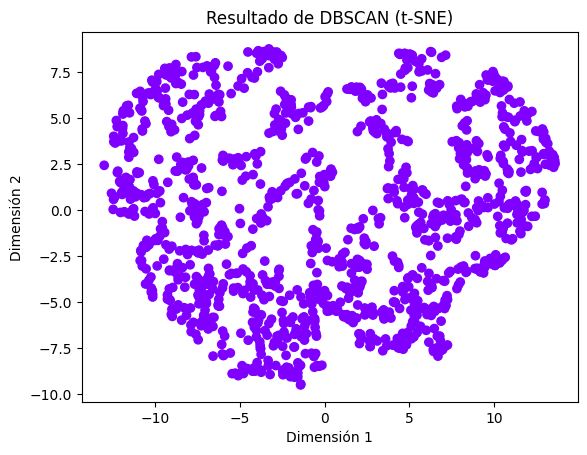

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Supongamos que tienes tus datos en X y las etiquetas de cluster en labels

# Realiza t-SNE para reducir la dimensionalidad a 2 componentes
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(df_feature)

# Grafica los datos proyectados en 2D, coloreando por etiquetas de cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='rainbow')
plt.title('Resultado de DBSCAN (t-SNE)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()


In [18]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Supongamos que tienes un conjunto de datos con múltiples características en una matriz numpy
# X es tu matriz de datos, donde cada fila representa una observación y cada columna es una característica.
# Asegúrate de que X esté en el formato adecuado.

# Escala tus datos para que tengan media 0 y varianza 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_feature)

# Crea una instancia de DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta estos parámetros según tus necesidades

# Ajusta el modelo a tus datos
dbscan.fit(X_scaled)

# Etiquetas de los clústeres asignados por DBSCAN. Los ruidosos tienen etiqueta -1.
labels = dbscan.labels_

# Número de clústeres encontrados (sin contar el ruido)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Muestra la cantidad de clústeres y sus miembros
print("Número de clústeres:", n_clusters)
for i in range(n_clusters):
    cluster_points = df_feature[labels == i]
    print(f"Clúster {i + 1} tiene {len(cluster_points)} miembros:")
    print(cluster_points)

# Puntos ruidosos (etiqueta -1)
noise_points = df_feature[labels == -1]
print("Puntos ruidosos:")
print(noise_points)


Número de clústeres: 17
Clúster 1 tiene 18 miembros:
      temperature_2m_max (°C)  rain_sum (mm)  precipitation_hours (h)   
50                       31.6            0.0                        0  \
368                      32.9            0.1                        1   
407                      32.8            0.0                        0   
416                      33.0            0.4                        1   
497                      33.2            0.0                        0   
610                      33.8            0.0                        0   
696                      30.2            0.0                        0   
757                      33.3            0.0                        0   
844                      30.9            0.1                        1   
847                      32.7            0.0                        0   
857                      34.1            0.0                        0   
883                      34.0            0.0                        0  

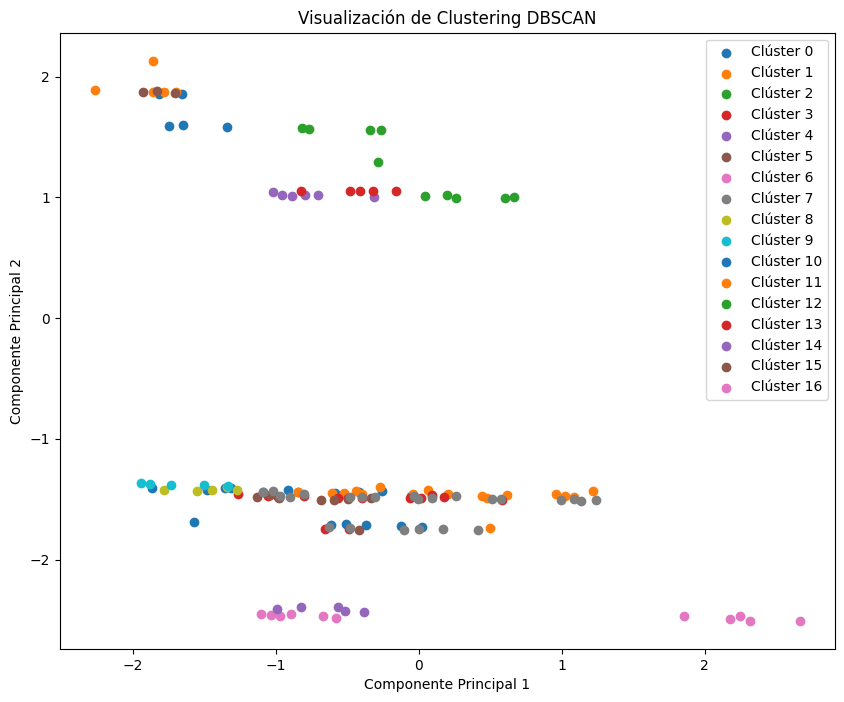

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Supongamos que ya has realizado el clustering DBSCAN y tienes las etiquetas en 'labels'
# y los datos originales en 'X_scaled' (los datos escalados)

# Reduce la dimensionalidad de los datos a 2 dimensiones usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Grafica los puntos en el plano 2D con colores según las etiquetas del clúster
plt.figure(figsize=(10, 8))
unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        # Puntos ruidosos en negro
        s1=1
        #plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], c='k', label='Ruido')
    else:
        # Puntos en clústeres
        plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], label=f'Clúster {label}')

plt.legend()
plt.title('Visualización de Clustering DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()



Elegir alguna métrica para determinar número de grupos, usarla y discutirla
Busca alguna revista científica que publique trabajos relacionados con el tuyo
Crea artículo mediante Latex con base en los lineamientos de la revista elegida y redacta ahí tus resultados, discusiones y bibliografía
Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados